In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 
%matplotlib inline

In [10]:
from sklearn.datasets import fetch_california_housing;
california_data=fetch_california_housing()
california_data


{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [50]:
df= pd.DataFrame(data=california_data.data, columns=california_data.feature_names)
df['MedHouseVal']=california_data.target
df
X=df.iloc[:,:-1]
y=df.iloc[:,-1]
df

# Add the target variable (house values) to the DataFrame

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [ ]:
import seaborn as sns
sns.pairplot(df)

In [ ]:
sns.regplot(x=df['MedInc'],y=df['MedHouseVal'])

In [51]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=42)

In [33]:
X_train.head()
y_train.head()
X_test.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
20046,1.6812,25.0,4.192201,1.022284,1392.0,3.877437,36.06,-119.01
3024,2.5313,30.0,5.039384,1.193493,1565.0,2.679795,35.14,-119.46
15663,3.4801,52.0,3.977155,1.185877,1310.0,1.360332,37.80,-122.44
20484,5.7376,17.0,6.163636,1.020202,1705.0,3.444444,34.28,-118.72
9814,3.7250,34.0,5.492991,1.028037,1063.0,2.483645,36.62,-121.93


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit_transform(X_train)
scaler.transform(X_test)



array([[-1.15411223, -0.28514924, -0.51346718, ...,  0.06447083,
         0.19367548,  0.28652736],
       [-0.70756701,  0.11133247, -0.16361884, ..., -0.03570466,
        -0.23746391,  0.06179445],
       [-0.20917611,  1.855852  , -0.6022714 , ..., -0.14606959,
         1.00909127, -1.4264368 ],
       ...,
       [-0.89908611,  0.66640687, -0.89340574, ...,  0.12360294,
        -0.76232924,  0.66108221],
       [ 1.58036659, -1.79177974,  0.80393479, ..., -0.04836253,
         1.34181841, -0.73725589],
       [ 1.44652384,  0.58711053,  0.12349223, ..., -0.04755791,
        -0.82325111,  0.5911653 ]])

In [49]:
from sklearn.linear_model import LinearRegression
regression=LinearRegression(n_jobs=-1)
regression.fit(X_train,y_train)
print(regression.coef_)
print(regression.intercept_)

[ 4.47600069e-01  9.56752596e-03 -1.24755956e-01  7.94471254e-01
 -1.43902596e-06 -3.44307993e-03 -4.18555257e-01 -4.33405135e-01]
-37.027827585269385


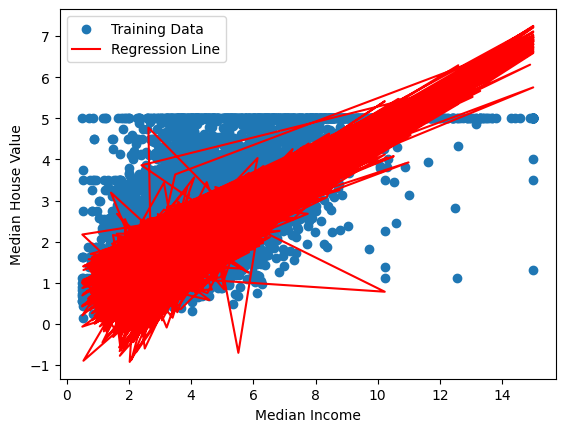

In [56]:
plt.scatter(X_train.iloc[:, 0], y_train, label="Training Data")  # Assuming MedInc is the first column
plt.plot(X_train.iloc[:, 0], regression.predict(X_train), color='red', label="Regression Line")
plt.xlabel('Median Income')
plt.ylabel('Median House Value')
plt.legend()
plt.show()

In [57]:


ypred=regression.predict(X_test)
from sklearn.metrics import mean_absolute_error,mean_squared_error
mse=mean_squared_error(y_test, ypred)
mas=mean_absolute_error(y_test,ypred)
rmse=np.sqrt(mse)
print(mse)
print(rmse)
print(mas)

0.5411287478470689
0.7356145375446769
0.5296964012919457
